In [3]:
# Imports

%matplotlib inline
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn.model_selection import train_test_split
from dmba import classificationSummary
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, BayesianRidge
import statsmodels.api as sm
import statsmodels.formula.api as smf
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
working_directory = os.getcwd()
print(working_directory)

no display found. Using non-interactive Agg backend
/Users/ds/Desktop/LOCAL DRIVE/MSBA/207/iPhone COMPETITION


In [ ]:
# Directory

path = working_directory + '/SBAnational.csv'
df = pd.read_csv(path)

/var/folders/f0/92f_sdt15l76hcdt6qdgqw7c0000gp/T/ipykernel_18372/1506848587.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


# Pre-Processing Data

In [3]:
df.shape

(899164, 27)

In [4]:
# Analyze Data

df.head(100)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1000935004,Hairline Inc.,Vancouver,WA,98663,WELLS FARGO BANK NATL ASSOC,SD,0,8-Apr-97,1997,...,0,N,NaN,28-Feb-99,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
96,1000944000,THE CAT'S MEOW,CEDAR RAPIDS,IA,52402,U.S. BANK NATIONAL ASSOCIATION,IA,451120,28-Feb-97,1997,...,N,Y,NaN,31-Aug-97,"$46,531.00",$0.00,P I F,$0.00,"$75,000.00","$60,000.00"
97,1000945007,James & Sheryl Brower,Clackamas,OR,97015,WELLS FARGO BANK NATL ASSOC,SD,421940,8-Apr-97,1997,...,0,N,NaN,31-Oct-97,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
98,1000965002,"KING'S GRANT RACQUET CLUB, INC",Cotuit,MA,2635,BANK OF AMERICA NATL ASSOC,MA,0,10-Apr-97,1997,...,0,N,NaN,30-Jun-97,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$30,000.00"


In [5]:
# Analyze Nulls and Data

df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [6]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

Due to high volume of data, we can remove recordsw with null or missing values as it would make a neglibible difference in our analysis.

In [7]:
df_clean = df.copy()

In [8]:
df_clean.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [9]:
# Drop null values
df_clean.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist', 'RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)

null_values = df_clean.isnull().sum()
print(null_values)

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64


In [10]:
df_clean.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

Need to remove dollar signs and commas from monetary values in the data set and make them float values so Python can analyze the data properly.

In [11]:
columns_to_convert = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

# Remove '$' and commas, then convert to float
for col in columns_to_convert:
    df_clean[col] = df_clean[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

print(df_clean.dtypes)

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object


In [12]:
df_clean[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0
...,...,...,...,...,...
899159,70000.0,0.0,0.0,70000.0,56000.0
899160,85000.0,0.0,0.0,85000.0,42500.0
899161,300000.0,0.0,0.0,300000.0,225000.0
899162,75000.0,0.0,46383.0,75000.0,60000.0


In [13]:
df_clean['NewExist'] = df_clean['NewExist'].astype('str')
df_clean['UrbanRural'] = df_clean['UrbanRural'].astype('str')
df_clean['Zip'] = df_clean['Zip'].astype('str')

# Remove the row
df_clean = df_clean[df_clean['ApprovalFY'] != '1976A']

# Reset index
df_clean.reset_index(drop=True, inplace=True)

# Convert 'ApprovalFY' to integer
df_clean['ApprovalFY'] = df_clean['ApprovalFY'].astype(int)

print(df_clean.dtypes)

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                   object
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist              object
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural            object
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object


In [14]:
df_clean['NewExist'].unique()

array(['2.0', '1.0', '0.0'], dtype=object)

In [15]:
df_clean['NewExist'].value_counts()

NewExist
1.0    636129
2.0    249075
0.0      1021
Name: count, dtype: int64

In [16]:
df_clean['NewExist'] = pd.to_numeric(df_clean['NewExist'], errors='coerce')

# Remove rows where 'NewExist' is 0.0
df_clean = df_clean[df_clean['NewExist'] != 0.0]

# Reset index
df_clean.reset_index(drop=True, inplace=True)

df_clean['NewExist'].value_counts()

NewExist
1.0    636129
2.0    249075
Name: count, dtype: int64

In [17]:
print(df_clean['RevLineCr'].unique())
print('')
print(df_clean['LowDoc'].unique())

['N' '0' 'Y' 'T' '`' ',' '1' 'C' '3' '2' 'R' '7' 'A' '5' '.' '4' '-' 'Q']

['Y' 'N' 'C' '1' 'S' 'R' 'A' '0']


In [18]:
# Where 'RevLineCr' and 'LowDoc' are not 'Y' or 'N'
df_clean = df_clean[df_clean['RevLineCr'].isin(['Y', 'N']) & df_clean['LowDoc'].isin(['Y', 'N'])]

# 'Y' to 1 and 'N' to 0
df_clean['RevLineCr'] = df_clean['RevLineCr'].map({'Y': 1, 'N': 0}).astype(int)
df_clean['LowDoc'] = df_clean['LowDoc'].map({'Y': 1, 'N': 0}).astype(int)

print(df_clean['RevLineCr'].unique())
print(df_clean['LowDoc'].unique())

[0 1]
[1 0]


In [19]:
print(df_clean['MIS_Status'].unique())
print('')
print(df_clean['MIS_Status'].value_counts())

['P I F' 'CHGOFF']

MIS_Status
P I F     499634
CHGOFF    110538
Name: count, dtype: int64


In [20]:
df_clean['Default'] = df_clean['MIS_Status'].map({'CHGOFF': 1, 'P I F': 0})

In [21]:
print(df_clean['Default'].unique())
print('')
print(df_clean['Default'].value_counts())

[0 1]

Default
0    499634
1    110538
Name: count, dtype: int64


In [22]:
# NAICS codes to industry names
industry_mapping = {
    '11': 'Agriculture, forestry, fishing and hunting',
    '21': 'Mining, quarrying, and oil and gas extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation and warehousing',
    '49': 'Transportation and warehousing',
    '51': 'Information',
    '52': 'Finance and insurance',
    '53': 'Real estate and rental and leasing',
    '54': 'Professional, scientific, and technical services',
    '55': 'Management of companies and enterprises',
    '56': 'Administrative and support and waste management and remediation services',
    '61': 'Educational services',
    '62': 'Health care and social assistance',
    '71': 'Arts, entertainment, and recreation',
    '72': 'Accommodation and food services',
    '81': 'Other services (except public administration)',
    '92': 'Public administration'
}

# mapping the first two digits of NAICS codes
df_clean['Industry'] = df_clean['NAICS'].astype(str).apply(lambda x: x[:2])
df_clean['Industry'] = df_clean['Industry'].map(industry_mapping)

# Drop rows where 'Industry' = NaN
df_clean.dropna(subset=['Industry'], inplace=True)

df_clean

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Default,Industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,0,Retail trade
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,0,Accommodation and food services
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,0,Health care and social assistance
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,...,NaN,30-Jun-97,517000.0,0.0,P I F,0.0,517000.0,387750.0,0,Manufacturing
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,...,NaN,30-Jun-98,45000.0,0.0,P I F,0.0,45000.0,36000.0,0,Other services (except public administration)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885185,9995233007,"M L B CONSTRUCTION, INC.",ELLICOTT,MD,21043,WELLS FARGO BANK NATL ASSOC,CA,233210,27-Feb-97,1997,...,NaN,31-Mar-97,25000.0,0.0,P I F,0.0,25000.0,12500.0,0,Construction
885186,9995263005,HILL AND SONS INC.,OAKLAND,CA,94603,MORTGAGE CAP. DEVEL CORP,CA,323111,27-Feb-97,1997,...,NaN,13-Aug-97,189000.0,0.0,P I F,0.0,189000.0,189000.0,0,Manufacturing
885197,9995493004,PULLTARPS MFG.,EL CAJON,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,314912,27-Feb-97,1997,...,NaN,31-Mar-97,200000.0,0.0,P I F,0.0,200000.0,150000.0,0,Manufacturing
885200,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,NaN,31-Oct-97,85000.0,0.0,P I F,0.0,85000.0,42500.0,0,Retail trade


In [23]:
# Drop columns deemed unecessary to the prediction task
columns_to_drop = ['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'ChgOffDate','NAICS', 'MIS_Status']

df_clean = df_clean.drop(columns=columns_to_drop)

print(df_clean.columns)
print(df_clean.isnull().sum())

Index(['State', 'BankState', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'Default',
       'Industry'],
      dtype='object')
State                0
BankState            0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
Default              0
Industry             0
dtype: int64


In [24]:
df_clean['Term']

0          84
1          60
2         180
5         120
7          84
         ... 
885185     60
885186    240
885197     36
885200     60
885201    108
Name: Term, Length: 456940, dtype: int64

In [25]:
# Create the 'RealEstate' dummy variable based on the 'Term'
df_clean['RealEstate'] = (df_clean['Term'] >= 240).astype(int)

df_clean[['Term', 'RealEstate']].head()

,Term,RealEstate
0,84,0
1,60,0
2,180,0
5,120,0
7,84,0


In [26]:
# Create the 'Portion' dummy variable
df_clean['Portion'] = df_clean['SBA_Appv'] / df_clean['GrAppv']

df_clean['Portion'].head()

0    0.80
1    0.80
2    0.75
5    0.75
7    0.80
Name: Portion, dtype: float64

In [27]:
# 'DisbursementDate' to datetime format
df_clean['DisbursementDate'] = pd.to_datetime(df_clean['DisbursementDate'])

condition = (
    ((2007 <= df_clean['DisbursementDate'].dt.year) & (df_clean['DisbursementDate'].dt.year <= 2009)) |
    ((df_clean['DisbursementDate'].dt.year < 2007) & 
     (df_clean['DisbursementDate'].dt.year + (df_clean['Term'] / 12) >= 2007))
)

# Create the 'Recession' column
df_clean['Recession'] = np.where(condition, 1, 0)

/var/folders/f0/92f_sdt15l76hcdt6qdgqw7c0000gp/T/ipykernel_9611/611235528.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['DisbursementDate'] = pd.to_datetime(df_clean['DisbursementDate'])


# 1. Data Exploration and Preprocessing
How is the outcome variable MIS_Status distributed? 

Identify predictors that may help predict MIS_Status using descriptive statistics and visualization.

In [28]:
print(df_clean.describe())

          ApprovalFY           Term          NoEmp       NewExist  \
count  456940.000000  456940.000000  456940.000000  456940.000000   
mean     2003.020642      93.811706       9.895455       1.265061   
min      1984.000000       0.000000       0.000000       1.000000   
25%      2000.000000      59.000000       2.000000       1.000000   
50%      2005.000000      84.000000       4.000000       1.000000   
75%      2007.000000      90.000000       9.000000       2.000000   
max      2014.000000     527.000000    9999.000000       2.000000   
std         5.657087      68.362394      56.807480       0.441366   

           CreateJob    RetainedJob  FranchiseCode      RevLineCr  \
count  456940.000000  456940.000000  456940.000000  456940.000000   
mean        1.896610       4.782175    1485.990782       0.420053   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.0000

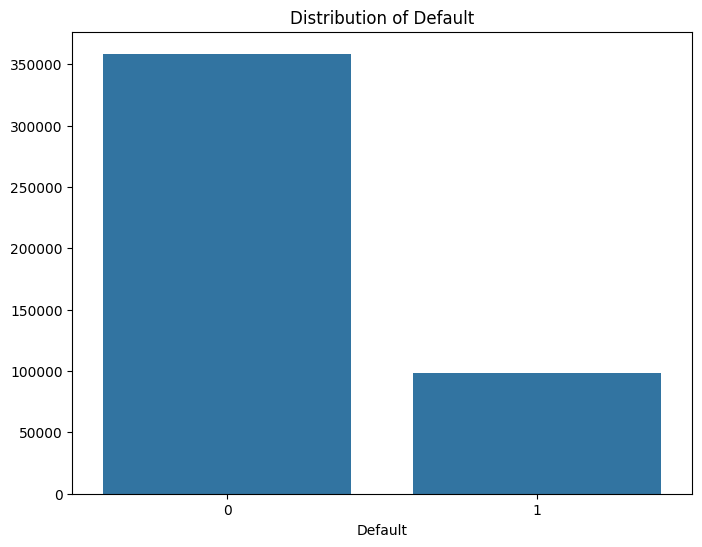

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mis_status_counts = df_clean['Default'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=mis_status_counts.index, y=mis_status_counts.values)
plt.title('Distribution of Default')
plt.show()

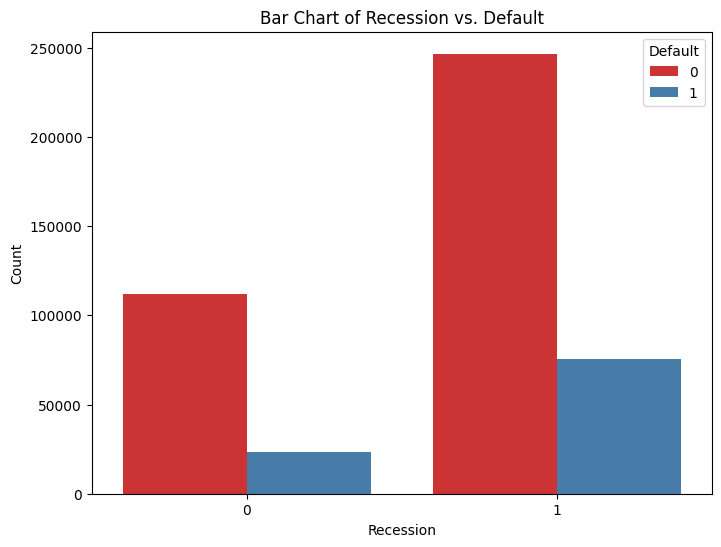

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Recession", hue="Default", data=df_clean, palette="Set1")
plt.xlabel("Recession")
plt.ylabel("Count")
plt.title("Bar Chart of Recession vs. Default")
plt.show()

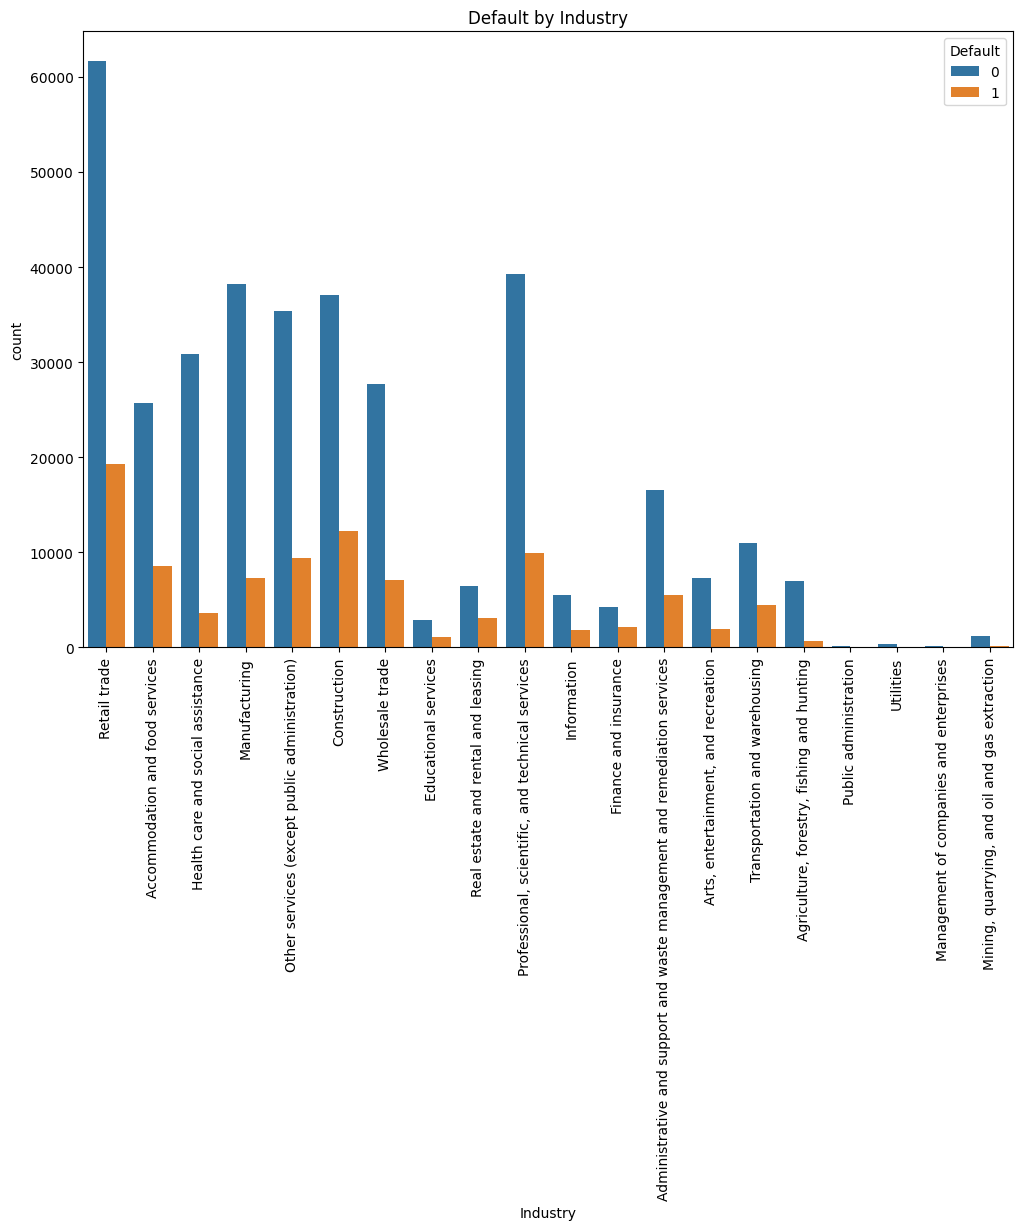

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Industry', hue='Default', data=df_clean)
plt.title('Default by Industry')
plt.xticks(rotation=90)
plt.show()

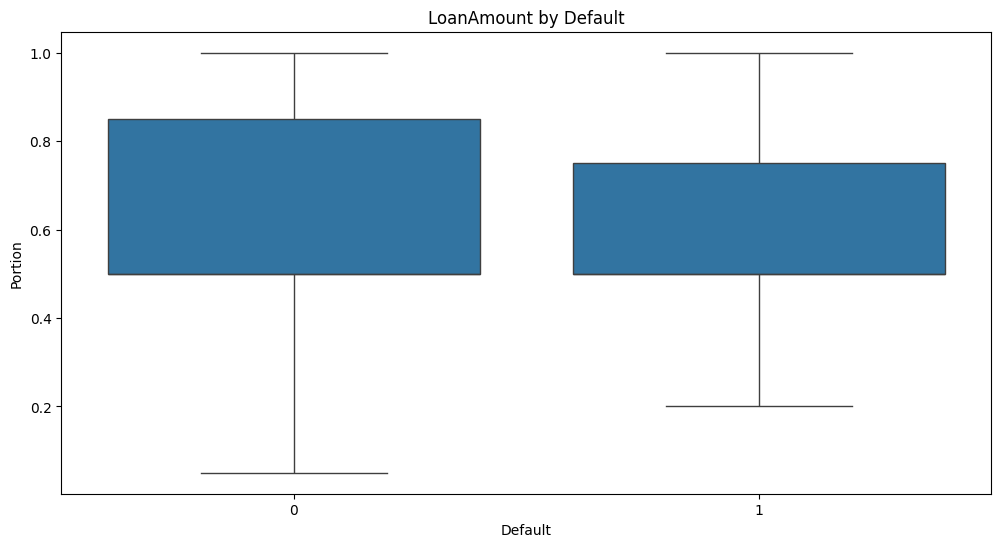

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Default', y='Portion', data=df_clean)
plt.title('LoanAmount by Default')
plt.show()

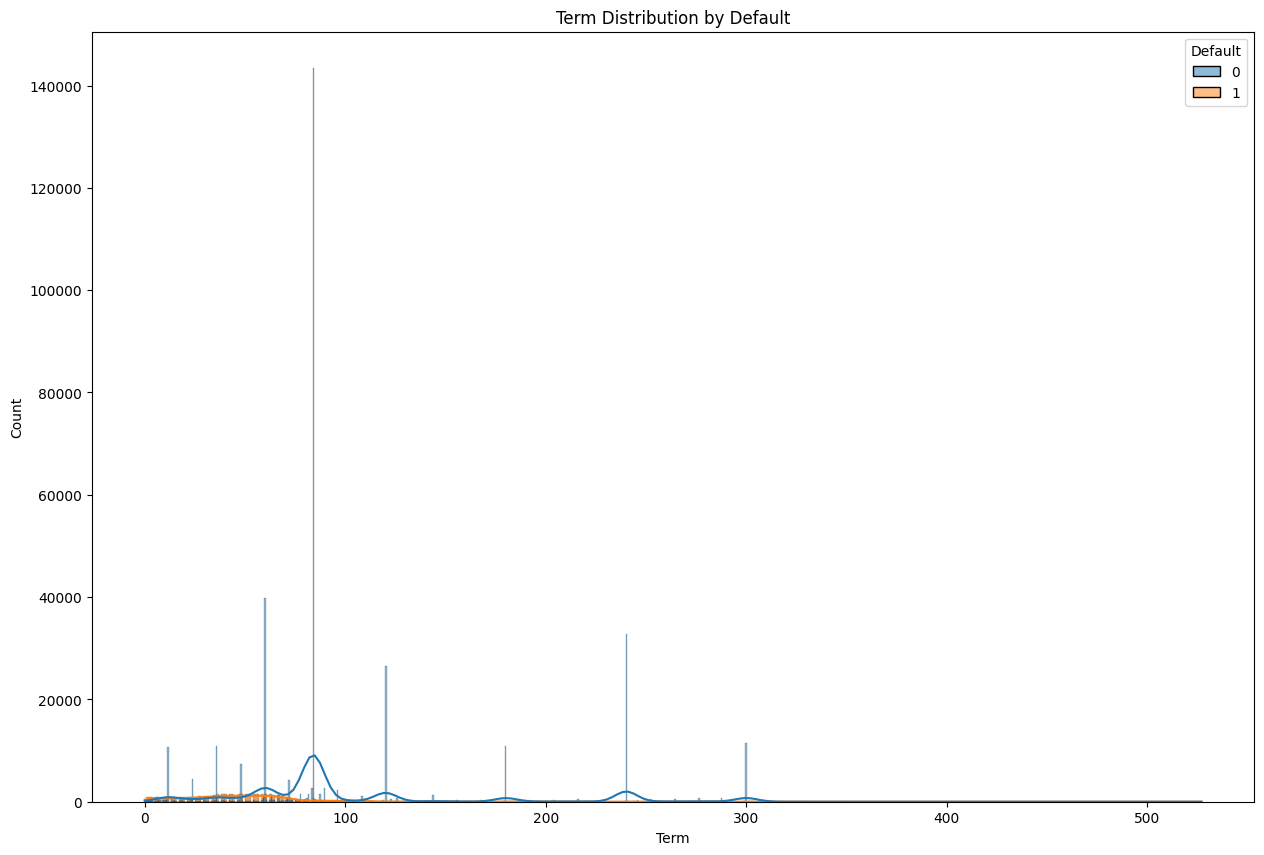

In [33]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df_clean, x='Term', hue='Default', kde=True)
plt.title('Term Distribution by Default')
plt.show()


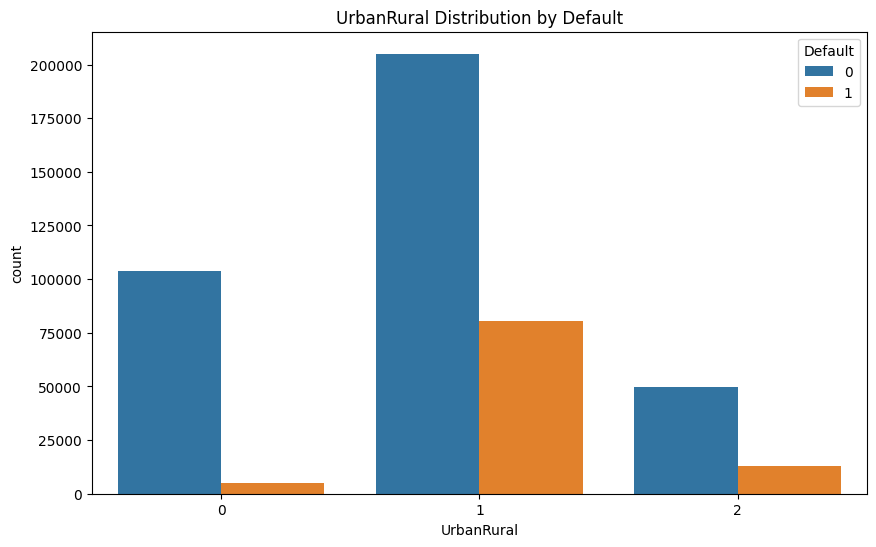

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='UrbanRural', hue='Default', data=df_clean)
plt.title('UrbanRural Distribution by Default')
plt.show()

In [ ]:
correlation_matrix = df_clean.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix = df_clean.corr()

correlations_to_default = correlation_matrix['Default'].drop('Default') 

print(correlations_to_default)

In [ ]:
correlation_matrix = df_clean.corr()

correlations_to_default = correlation_matrix['Default'].drop('Default') 

sorted_correlations = correlations_to_default.abs().sort_values(ascending=False)

print(sorted_correlations)

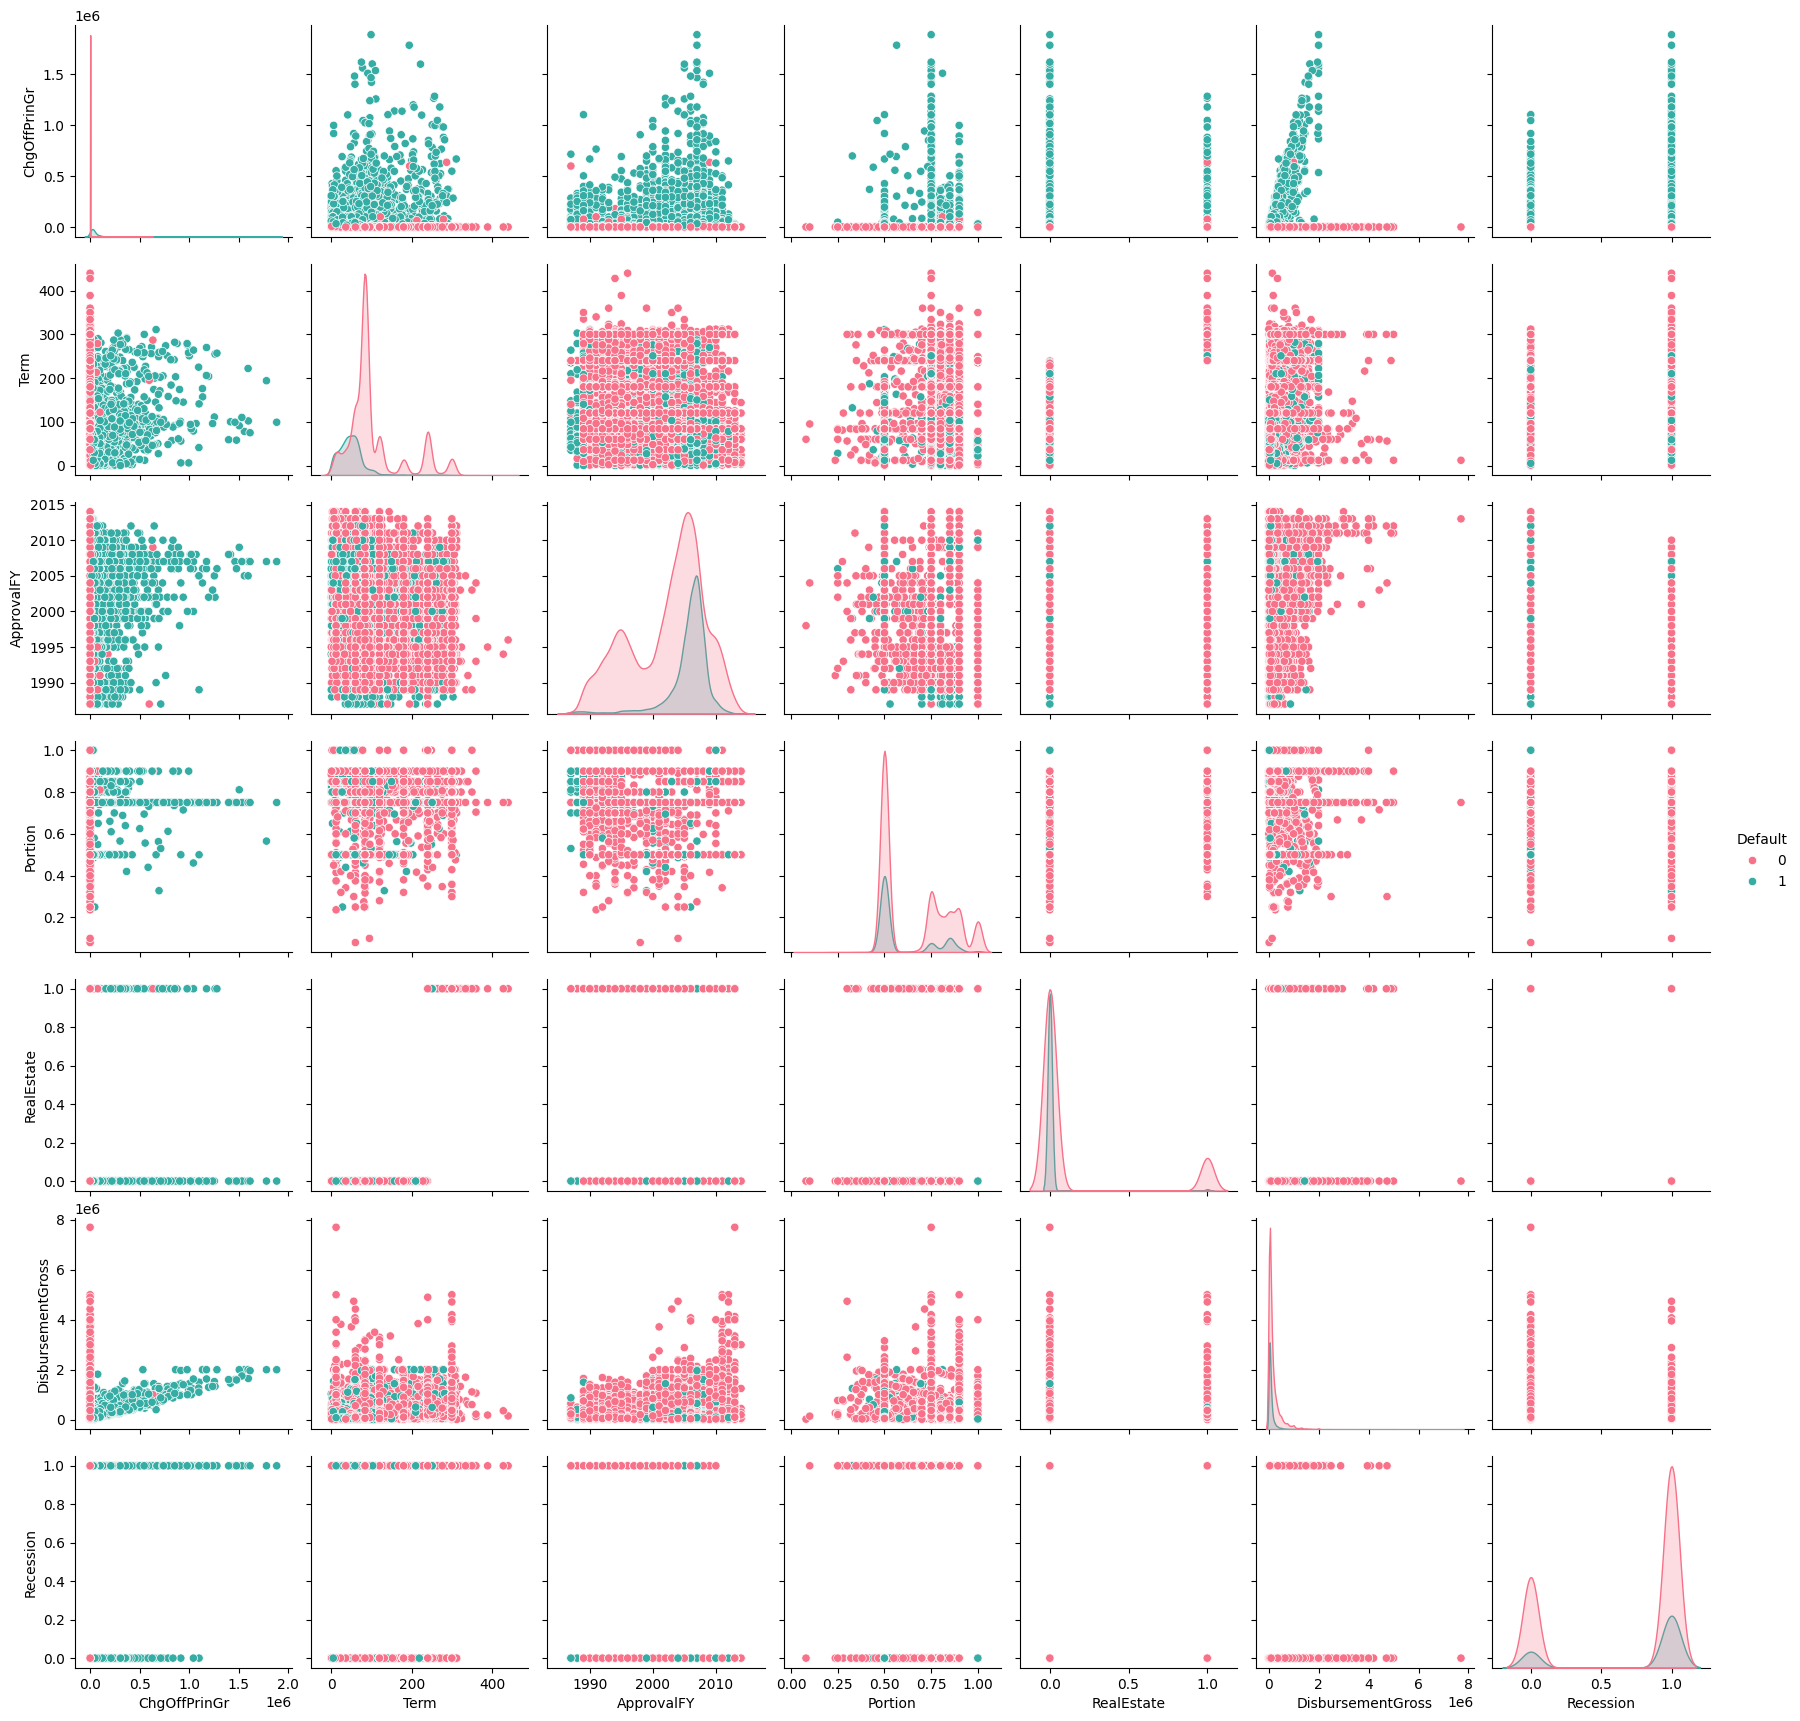

In [36]:
# Visualizations for top variables correlated
# Had to sample data since it was taking so long to create the charts

selected_variables = ['ChgOffPrinGr', 'Term', 'ApprovalFY', 'Portion', 'RealEstate', 'DisbursementGross', 'Recession']
sampled_data = df_clean.sample(frac=0.1)
sns.pairplot(sampled_data, vars=selected_variables, hue="Default", palette="husl")

plt.show()

## Best Predictors for this task:
    
['ChgOffPrinGr', 'Term', 'ApprovalFY', 'Portion', 'RealEstate', 'SBA_Appv', 'GrAppv', 'DisbursementGross', 'LowDoc', 'RevLineCr', 'Recession']

# Corey's Part Starts Here

In [5]:
#For Corey
path = working_directory + '/SBAnational.csv'
df = pd.read_csv(path)

df_clean = df.copy()

# Drop null values
df_clean.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist', 'RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)

null_values = df_clean.isnull().sum()
print(null_values)


columns_to_convert = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

# Remove '$' and commas, then convert to float
for col in columns_to_convert:
    df_clean[col] = df_clean[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

print(df_clean.dtypes)




df_clean['NewExist'] = df_clean['NewExist'].astype('str')
df_clean['UrbanRural'] = df_clean['UrbanRural'].astype('str')
df_clean['Zip'] = df_clean['Zip'].astype('str')

# Remove the row
df_clean = df_clean[df_clean['ApprovalFY'] != '1976A']

# Reset index
df_clean.reset_index(drop=True, inplace=True)

# Convert 'ApprovalFY' to integer
df_clean['ApprovalFY'] = df_clean['ApprovalFY'].astype(int)

print(df_clean.dtypes)



df_clean['NewExist'] = pd.to_numeric(df_clean['NewExist'], errors='coerce')

# Remove rows where 'NewExist' is 0.0
df_clean = df_clean[df_clean['NewExist'] != 0.0]

# Reset index
df_clean.reset_index(drop=True, inplace=True)

df_clean['NewExist'].value_counts()



# Where 'RevLineCr' and 'LowDoc' are not 'Y' or 'N'
df_clean = df_clean[df_clean['RevLineCr'].isin(['Y', 'N']) & df_clean['LowDoc'].isin(['Y', 'N'])]

# 'Y' to 1 and 'N' to 0
df_clean['RevLineCr'] = df_clean['RevLineCr'].map({'Y': 1, 'N': 0}).astype(int)
df_clean['LowDoc'] = df_clean['LowDoc'].map({'Y': 1, 'N': 0}).astype(int)

print(df_clean['RevLineCr'].unique())
print(df_clean['LowDoc'].unique())



print(df_clean['MIS_Status'].unique())
print('')
print(df_clean['MIS_Status'].value_counts())


df_clean['Default'] = df_clean['MIS_Status'].map({'CHGOFF': 1, 'P I F': 0})


print(df_clean['Default'].unique())
print('')
print(df_clean['Default'].value_counts())


# NAICS codes to industry names
industry_mapping = {
    '11': 'Agriculture, forestry, fishing and hunting',
    '21': 'Mining, quarrying, and oil and gas extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation and warehousing',
    '49': 'Transportation and warehousing',
    '51': 'Information',
    '52': 'Finance and insurance',
    '53': 'Real estate and rental and leasing',
    '54': 'Professional, scientific, and technical services',
    '55': 'Management of companies and enterprises',
    '56': 'Administrative and support and waste management and remediation services',
    '61': 'Educational services',
    '62': 'Health care and social assistance',
    '71': 'Arts, entertainment, and recreation',
    '72': 'Accommodation and food services',
    '81': 'Other services (except public administration)',
    '92': 'Public administration'
}

# mapping the first two digits of NAICS codes
df_clean['Industry'] = df_clean['NAICS'].astype(str).apply(lambda x: x[:2])
df_clean['Industry'] = df_clean['Industry'].map(industry_mapping)

# Drop rows where 'Industry' = NaN
df_clean.dropna(subset=['Industry'], inplace=True)

df_clean


# Drop columns deemed unecessary to the prediction task
columns_to_drop = ['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'ChgOffDate','NAICS', 'MIS_Status']

df_clean = df_clean.drop(columns=columns_to_drop)

print(df_clean.columns)
print(df_clean.isnull().sum())


df_clean['Term']


# Create the 'RealEstate' dummy variable based on the 'Term'
df_clean['RealEstate'] = (df_clean['Term'] >= 240).astype(int)

df_clean[['Term', 'RealEstate']].head()


# Create the 'Portion' dummy variable
df_clean['Portion'] = df_clean['SBA_Appv'] / df_clean['GrAppv']

df_clean['Portion'].head()



# 'DisbursementDate' to datetime format
df_clean['DisbursementDate'] = pd.to_datetime(df_clean['DisbursementDate'])

condition = (
    ((2007 <= df_clean['DisbursementDate'].dt.year) & (df_clean['DisbursementDate'].dt.year <= 2009)) |
    ((df_clean['DisbursementDate'].dt.year < 2007) & 
     (df_clean['DisbursementDate'].dt.year + (df_clean['Term'] / 12) >= 2007))
)

# Create the 'Recession' column
df_clean['Recession'] = np.where(condition, 1, 0)

/var/folders/f0/92f_sdt15l76hcdt6qdgqw7c0000gp/T/ipykernel_18372/2407493743.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64
LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64

/var/folders/f0/92f_sdt15l76hcdt6qdgqw7c0000gp/T/ipykernel_18372/2407493743.py:143: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['DisbursementDate'] = pd.to_datetime(df_clean['DisbursementDate'])


In [6]:
df_clean.dtypes

State                        object
BankState                    object
ApprovalDate                 object
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                   object
RevLineCr                     int64
LowDoc                        int64
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
Default                       int64
Industry                     object
RealEstate                    int64
Portion                     float64
Recession                     int64
dtype: object

In [7]:
# Create a new df with only the selected columns
selected_columns = ['ChgOffPrinGr', 'Term', 'ApprovalFY', 'Portion', 'RealEstate', 'SBA_Appv', 'GrAppv', 'DisbursementGross', 'LowDoc', 'RevLineCr', 'Recession', 'Default']
df_clean = df_clean[selected_columns].copy()

In [8]:
df_clean.dtypes

ChgOffPrinGr         float64
Term                   int64
ApprovalFY             int64
Portion              float64
RealEstate             int64
SBA_Appv             float64
GrAppv               float64
DisbursementGross    float64
LowDoc                 int64
RevLineCr              int64
Recession              int64
Default                int64
dtype: object

In [9]:
# Define predictors and outcome
predictors = ['ChgOffPrinGr', 'Term', 'ApprovalFY', 'Portion', 'RealEstate', 
              'SBA_Appv', 'GrAppv', 'DisbursementGross', 'LowDoc', 'RevLineCr', 'Recession']
outcome = 'Default'

# Perform the split
train_df, valid_df = train_test_split(df_clean, test_size=0.4, random_state=1)

# Scale Variables
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

# Transform the predictors of training and validation sets
train_X = scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]

print('done')

done


# NEURAL NETWORKS

For neural networks, justify parameters chosen:

- size of hidden layer(s)
- activation function
- solver
- learning rate


# NOTES
In neural networks, especially in binary classification tasks, the concept of selecting a cut-off probability is not as straightforward as in some traditional statistical models like logistic regression. Neural networks typically output probabilities through activation functions (e.g., softmax for multi-class classification or sigmoid for binary classification). The predicted class is then determined based on these probabilities.

In most cases, the decision boundary is set at 0.5 for binary classification problems. If the output probability is equal to or greater than 0.5, the instance is classified as the positive class; otherwise, it is classified as the negative class.

In [13]:
# (1) trying relu, sgd, max_iter=100,000

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='relu', solver='sgd', random_state=1, max_iter=100000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.9906041642099629
Best parameters:  {'hidden_layer_sizes': 9}


In [32]:
# (2) trying relu, lbfgs, max_iter=100,000

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='relu', solver='lbfgs', random_state=1, max_iter=100000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best score:  0.993525771896907
Best parameters:  {'hidden_layer_sizes': 1}


In [30]:
# (3) trying logistic, lbfgs, max_iter=100,000

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=100000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.9934382335038776
Best parameters:  {'hidden_layer_sizes': 2}


In [31]:
# (4) trying logistic, sgd, max_iter=100,000

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='sgd', random_state=1, max_iter=100000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.987478296503135
Best parameters:  {'hidden_layer_sizes': 1}


In [23]:
# (5) trying relu, adam, max_iter=100,000

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='relu', solver='adam', random_state=1, max_iter=100000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.9929932451315915
Best parameters:  {'hidden_layer_sizes': 13}


In [36]:
# (6) trying logistic, adam, max_iter=100,000

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='adam', random_state=1, max_iter=100000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.9920449081722745
Best parameters:  {'hidden_layer_sizes': 17}


The highest accuracy score was model#2 - relu, lbfgs with max_iter=100,000. The model did not fully converge but gave an accuracy score regardless. I wouldn't use this model as it just means that GridSearchCV completed.

The next best model was model#3 - logistic, lbfgs with max_iter=100,000. This model fully converged.

Output: Best score:  0.9934382335038776
Best parameters:  {'hidden_layer_sizes': 2}

In [37]:
from sklearn.neural_network import MLPClassifier, MLPRegressor


# (1) define and train a neural network with relu, sgd, max_iter=100,000
mlp_relu_sgd = MLPClassifier(
    hidden_layer_sizes=(9,),
    activation='relu',
    solver='sgd',
    learning_rate='constant',
    learning_rate_init=0.001,
    random_state=1,
    max_iter=100000
)
mlp_relu_sgd.fit(train_X, train_y.values)

# print completion msg
print("Neural Network with ReLU Activation & sgd trained successfully.")


# (2) define and train a neural network with relu, lbfgs, max_iter=100,000
mlp_relu_lbfgs = MLPClassifier(
    hidden_layer_sizes=(1,),
    activation='relu',
    solver='lbfgs',
    learning_rate='constant',
    learning_rate_init=0.001,
    random_state=1,
    max_iter=100000
)
mlp_relu_lbfgs.fit(train_X, train_y.values)

# print completion msg
print("Neural Network with ReLU Activation & lbfgs trained successfully.")


# (3) define and train a neural network with logistic, lbfgs, max_iter=100,000
mlp_logistic_lbfgs = MLPClassifier(
    hidden_layer_sizes=(2,),
    activation='logistic',
    solver='lbfgs',
    learning_rate='constant',
    learning_rate_init=0.001,
    random_state=1,
    max_iter=100000
)
mlp_logistic_lbfgs.fit(train_X, train_y.values)

# print completion msg
print("Neural Network with Logistic Activation & lbfgs trained successfully.")


# (4) define and train a neural network with logistic, sgd, max_iter=100,000
mlp_logistic_sgd = MLPClassifier(
    hidden_layer_sizes=(1,),
    activation='logistic',
    solver='sgd',
    learning_rate='constant',
    learning_rate_init=0.001,
    random_state=1,
    max_iter=100000
)
mlp_logistic_sgd.fit(train_X, train_y.values)

# print completion msg
print("Neural Network with Logistic Activation & sgd trained successfully.")


# (5) define and train a neural network with relu, adam, max_iter=100,000
mlp_relu_adam = MLPClassifier(
    hidden_layer_sizes=(13,),
    activation='relu',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001,
    random_state=1,
    max_iter=100000
)
mlp_relu_adam.fit(train_X, train_y.values)

# print completion msg
print("Neural Network with ReLU Activation & adam trained successfully.")


# (6) define and train a neural network with logistic, adam, max_iter=100,000
mlp_logistic_adam = MLPClassifier(
    hidden_layer_sizes=(17,),
    activation='logistic',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001,
    random_state=1,
    max_iter=100000
)
mlp_logistic_adam.fit(train_X, train_y.values)

# print completion msg
print("Neural Network with Logistic Activation & adam trained successfully.")

Neural Network with ReLU Activation & sgd trained successfully.
Neural Network with ReLU Activation & lbfgs trained successfully.
Neural Network with Logistic Activation & lbfgs trained successfully.
Neural Network with Logistic Activation & sgd trained successfully.
Neural Network with ReLU Activation & adam trained successfully.
Neural Network with Logistic Activation & adam trained successfully.


In [41]:
# validation set evaluation

#1
validation_accuracy_relu_sgd = mlp_relu_sgd.score(valid_X, valid_y)
print(f"Validation Accuracy (ReLU sgd): {validation_accuracy_relu_sgd:.4f}")

#2
validation_accuracy_relu_lbfgs = mlp_relu_lbfgs.score(valid_X, valid_y)
print(f"Validation Accuracy (ReLU lbfgs): {validation_accuracy_relu_lbfgs:.4f}")

#3
validation_accuracy_logistic_lbfgs = mlp_logistic_lbfgs.score(valid_X, valid_y)
print(f"Validation Accuracy (Logistic lbfgs): {validation_accuracy_logistic_lbfgs:.4f} --OUR CHOICE--")

#4
validation_accuracy_logistic_sgd = mlp_logistic_sgd.score(valid_X, valid_y)
print(f"Validation Accuracy (Logistic sgd): {validation_accuracy_logistic_sgd:.4f}")

#5
validation_accuracy_relu_adam = mlp_relu_adam.score(valid_X, valid_y)
print(f"Validation Accuracy (ReLU adam): {validation_accuracy_relu_adam:.4f}")

#6
validation_accuracy_logistic_adam = mlp_logistic_adam.score(valid_X, valid_y)
print(f"Validation Accuracy (Logistic adam): {validation_accuracy_logistic_adam:.4f}")


Validation Accuracy (ReLU sgd): 0.9907
Validation Accuracy (ReLU lbfgs): 0.9937
Validation Accuracy (Logistic lbfgs): 0.9937 --OUR CHOICE--
Validation Accuracy (Logistic sgd): 0.9875
Validation Accuracy (ReLU adam): 0.9930
Validation Accuracy (Logistic adam): 0.9922


^ Setting 'learning_rate' to either 'invscaling' or 'adaptive', has no effect on accuracy scores. Likewise, setting learning rate to '0.01' or '0.1' does not affect accuracy scores. With this in mind, the default values for 'learning_rate' and 'learning_rate_init' were kept. 'constant' & '0.001' respectively.

Accuracy changed slightly when trying different combinations of activation function and solver. The iterative process can see seen above. The accuracy scores don't vary much but as the goal is to maximize accuracy and in-turn, profit, we are choosing the "best" model (Logistic lbfgs) with hidden_layer_sizes=(2,).

In [42]:
classificationSummary(valid_y, mlp_logistic_lbfgs.predict(valid_X))

Confusion Matrix (Accuracy 0.9937)

       Prediction
Actual      0      1
     0 142386   1096
     1     58  39236


# DISCRIMINANT ANALYSIS

Partition the data (60\% training and 40\% validation) and then perform a discriminant analysis that models 'Default' as a function of the remaining predictors

In [130]:
#For Corey
path = working_directory + '/SBAnational.csv'
df = pd.read_csv(path)

df_clean = df.copy()

# Drop null values
df_clean.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist', 'RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)

null_values = df_clean.isnull().sum()
print(null_values)


columns_to_convert = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

# Remove '$' and commas, then convert to float
for col in columns_to_convert:
    df_clean[col] = df_clean[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

print(df_clean.dtypes)




df_clean['NewExist'] = df_clean['NewExist'].astype('str')
df_clean['UrbanRural'] = df_clean['UrbanRural'].astype('str')
df_clean['Zip'] = df_clean['Zip'].astype('str')

# Remove the row
df_clean = df_clean[df_clean['ApprovalFY'] != '1976A']

# Reset index
df_clean.reset_index(drop=True, inplace=True)

# Convert 'ApprovalFY' to integer
df_clean['ApprovalFY'] = df_clean['ApprovalFY'].astype(int)

print(df_clean.dtypes)



df_clean['NewExist'] = pd.to_numeric(df_clean['NewExist'], errors='coerce')

# Remove rows where 'NewExist' is 0.0
df_clean = df_clean[df_clean['NewExist'] != 0.0]

# Reset index
df_clean.reset_index(drop=True, inplace=True)

df_clean['NewExist'].value_counts()



# Where 'RevLineCr' and 'LowDoc' are not 'Y' or 'N'
df_clean = df_clean[df_clean['RevLineCr'].isin(['Y', 'N']) & df_clean['LowDoc'].isin(['Y', 'N'])]

# 'Y' to 1 and 'N' to 0
df_clean['RevLineCr'] = df_clean['RevLineCr'].map({'Y': 1, 'N': 0}).astype(int)
df_clean['LowDoc'] = df_clean['LowDoc'].map({'Y': 1, 'N': 0}).astype(int)

print(df_clean['RevLineCr'].unique())
print(df_clean['LowDoc'].unique())



print(df_clean['MIS_Status'].unique())
print('')
print(df_clean['MIS_Status'].value_counts())


df_clean['Default'] = df_clean['MIS_Status'].map({'CHGOFF': 1, 'P I F': 0})


print(df_clean['Default'].unique())
print('')
print(df_clean['Default'].value_counts())


# NAICS codes to industry names
industry_mapping = {
    '11': 'Agriculture, forestry, fishing and hunting',
    '21': 'Mining, quarrying, and oil and gas extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation and warehousing',
    '49': 'Transportation and warehousing',
    '51': 'Information',
    '52': 'Finance and insurance',
    '53': 'Real estate and rental and leasing',
    '54': 'Professional, scientific, and technical services',
    '55': 'Management of companies and enterprises',
    '56': 'Administrative and support and waste management and remediation services',
    '61': 'Educational services',
    '62': 'Health care and social assistance',
    '71': 'Arts, entertainment, and recreation',
    '72': 'Accommodation and food services',
    '81': 'Other services (except public administration)',
    '92': 'Public administration'
}

# mapping the first two digits of NAICS codes
df_clean['Industry'] = df_clean['NAICS'].astype(str).apply(lambda x: x[:2])
df_clean['Industry'] = df_clean['Industry'].map(industry_mapping)

# Drop rows where 'Industry' = NaN
df_clean.dropna(subset=['Industry'], inplace=True)

df_clean


# Drop columns deemed unecessary to the prediction task
columns_to_drop = ['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'ChgOffDate','NAICS', 'MIS_Status']

df_clean = df_clean.drop(columns=columns_to_drop)

print(df_clean.columns)
print(df_clean.isnull().sum())


df_clean['Term']


# Create the 'RealEstate' dummy variable based on the 'Term'
df_clean['RealEstate'] = (df_clean['Term'] >= 240).astype(int)

df_clean[['Term', 'RealEstate']].head()


# Create the 'Portion' dummy variable
df_clean['Portion'] = df_clean['SBA_Appv'] / df_clean['GrAppv']

df_clean['Portion'].head()



# 'DisbursementDate' to datetime format
df_clean['DisbursementDate'] = pd.to_datetime(df_clean['DisbursementDate'])

condition = (
    ((2007 <= df_clean['DisbursementDate'].dt.year) & (df_clean['DisbursementDate'].dt.year <= 2009)) |
    ((df_clean['DisbursementDate'].dt.year < 2007) & 
     (df_clean['DisbursementDate'].dt.year + (df_clean['Term'] / 12) >= 2007))
)

# Create the 'Recession' column
df_clean['Recession'] = np.where(condition, 1, 0)

/var/folders/f0/92f_sdt15l76hcdt6qdgqw7c0000gp/T/ipykernel_9611/2407493743.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64
LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64

/var/folders/f0/92f_sdt15l76hcdt6qdgqw7c0000gp/T/ipykernel_9611/2407493743.py:143: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['DisbursementDate'] = pd.to_datetime(df_clean['DisbursementDate'])


In [131]:
df_clean.dtypes

State                        object
BankState                    object
ApprovalDate                 object
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                   object
RevLineCr                     int64
LowDoc                        int64
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
Default                       int64
Industry                     object
RealEstate                    int64
Portion                     float64
Recession                     int64
dtype: object

In [132]:
# Create a new df with only the selected columns
selected_columns = ['ChgOffPrinGr', 'Term', 'ApprovalFY', 'Portion', 'RealEstate', 'SBA_Appv', 'GrAppv', 'DisbursementGross', 'LowDoc', 'RevLineCr', 'Recession', 'Default']
df_clean = df_clean[selected_columns].copy()

In [133]:
df_clean.dtypes

ChgOffPrinGr         float64
Term                   int64
ApprovalFY             int64
Portion              float64
RealEstate             int64
SBA_Appv             float64
GrAppv               float64
DisbursementGross    float64
LowDoc                 int64
RevLineCr              int64
Recession              int64
Default                int64
dtype: object

In [134]:
# Define predictors and outcome
predictors = ['ChgOffPrinGr', 'Term', 'ApprovalFY', 'Portion', 'RealEstate', 
              'SBA_Appv', 'GrAppv', 'DisbursementGross', 'LowDoc', 'RevLineCr', 'Recession']
outcome = 'Default'

# Perform the split
train_df, valid_df = train_test_split(df_clean, test_size=0.4, random_state=1)

# Scale Variables
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

# Transform the predictors of training and validation sets
train_X = scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]

print('done')

done


In [138]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# perform discriminant analysis
model = LinearDiscriminantAnalysis(priors=[0.5, 0.5])
model.fit(train_X, train_y)

LinearDiscriminantAnalysis(priors=[0.5, 0.5])

In [152]:
from sklearn.metrics import classification_report

# predict on the validation set
valid_predictions = model.predict(valid_X)

# print classification report and confusion matrix
print("Classification Report:")
print(classification_report(valid_y, valid_predictions))

classificationSummary(valid_y,model.predict(valid_X))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93    143482
           1       0.68      0.90      0.77     39294

    accuracy                           0.89    182776
   macro avg       0.83      0.89      0.85    182776
weighted avg       0.91      0.89      0.89    182776

Confusion Matrix (Accuracy 0.8876)

       Prediction
Actual      0      1
     0 126858  16624
     1   3927  35367


In [149]:
# convert 'Default' to numeric
df_clean['Default'] = pd.to_numeric(df_clean['Default'], errors='coerce')

# define acceptors and non-acceptors
Defaulted = df_clean[df_clean['Default'] == 1]
PIF = df_clean[df_clean['Default'] == 0]

# compute summary statistics for continuous predictors (mean and standard deviation)
continuous_predictors = ['ChgOffPrinGr', 'Term', 'ApprovalFY', 'Portion', 'SBA_Appv', 'GrAppv', 'DisbursementGross']
defaulted_continuous_stats = Defaulted[continuous_predictors].describe()
PIF_continuous_stats = PIF[continuous_predictors].describe()

# compute percentages for categorical
categorical_predictors = ['RealEstate', 'Recession', 'LowDoc', 'RevLineCr']
defaulted_categorical_stats = Defaulted[categorical_predictors].apply(lambda x: x.value_counts(normalize=True) * 100)
PIF_categorical_stats = PIF[categorical_predictors].apply(lambda x: x.value_counts(normalize=True) * 100)

# print results
print("Defaulted - Continuous Predictors Summary:")
print(defaulted_continuous_stats)

print("\nPaid In Full - Continuous Predictors Summary:")
print(PIF_continuous_stats)

print("\nDefaulted - Categorical Predictors Summary:")
print(defaulted_categorical_stats)

print("\nPaid In Full - Categorical Predictors Summary:")
print(PIF_categorical_stats)


Defaulted - Continuous Predictors Summary:
       ChgOffPrinGr          Term    ApprovalFY       Portion      SBA_Appv  \
count  9.838200e+04  98382.000000  98382.000000  98382.000000  9.838200e+04   
mean   5.951532e+04     49.443608   2005.616149      0.589393  5.612556e+04   
std    1.132874e+05     36.369585      3.372353      0.148913  1.258474e+05   
min    0.000000e+00      0.000000   1987.000000      0.200000  5.000000e+02   
25%    1.521100e+04     28.000000   2005.000000      0.500000  1.250000e+04   
50%    2.890400e+04     46.000000   2006.000000      0.500000  2.125000e+04   
75%    5.000000e+04     63.000000   2007.000000      0.750000  4.250000e+04   
max    3.512596e+06    362.000000   2014.000000      1.000000  3.411950e+06   

             GrAppv  DisbursementGross  
count  9.838200e+04       9.838200e+04  
mean   8.468404e+04       1.052974e+05  
std    1.674680e+05       1.724806e+05  
min    1.000000e+03       4.000000e+03  
25%    2.400000e+04       2.500000e+04  

# Calculating Avg. Net Profits - Neural Network

In [165]:
df_clean['DisbursementGross'].mean()

172161.68970762024

In [43]:
# Data for confusion matrices
confusion_matrices ={
'Accuracy 0.9899': {'Actual 0': [142386, 1096], 'Actual 1': [58, 39236]}
}

disbursement_gross_avg = df_clean['DisbursementGross'].mean ()
profit_per_accept = 0.05 * disbursement_gross_avg
loss_per_default = -5 * profit_per_accept

# store the average net profits for each confusion matrix
average_net_profits = {}

# average net profit
for accuracy, matrix in confusion_matrices.items ():
    # Extract values
    tn, fp = matrix['Actual 0']
    fn, tp = matrix['Actual 1']

    # total profits and losses
    total_profit = tp * profit_per_accept
    total_loss = fn * loss_per_default

    # average net profit
    total_loans = tp + fp + fn + tn
    average_net_profit = (total_profit + total_loss) / total_loans

    # Store the average net profit
    average_net_profits[accuracy] = average_net_profit

average_net_profits

{'Accuracy 0.9899': 1834.2148770497708}

# Calculating Avg. Net Profits - Discriminant Analysis

In [167]:
# Data for confusion matrices
confusion_matrices ={
'Accuracy 0.9899': {'Actual 0': [126858, 16624], 'Actual 1': [3927, 35367]}
}

disbursement_gross_avg = df_clean['DisbursementGross'].mean ()
profit_per_accept = 0.05 * disbursement_gross_avg
loss_per_default = -5 * profit_per_accept

# store the average net profits for each confusion matrix
average_net_profits = {}

# average net profit
for accuracy, matrix in confusion_matrices.items ():
    # Extract values
    tn, fp = matrix['Actual 0']
    fn, tp = matrix['Actual 1']

    # total profits and losses
    total_profit = tp * profit_per_accept
    total_loss = fn * loss_per_default

    # average net profit
    total_loans = tp + fp + fn + tn
    average_net_profit = (total_profit + total_loss) / total_loans

    # Store the average net profit
    average_net_profits[accuracy] = average_net_profit

average_net_profits

{'Accuracy 0.9899': 740.9199518755967}